In [71]:
### NAME : PRANAV DOSHI
#### EMAIL : pranavdoshi14@gmail.com

In [350]:
### import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [368]:
### read data
df = pd.read_csv('screening_exercise_orders_v201810.csv')
print(df.info())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null object
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB
None


,customer_id,gender,date,value,predicted_gender
0,1000,0,1/1/17 0:11,198.50,1
1,1001,0,1/1/17 0:29,338.00,1
2,1002,1,1/1/17 1:30,733.00,1
3,1003,1,1/1/17 1:34,772.00,1
4,1004,0,1/1/17 3:11,508.00,1
5,1005,1,1/1/17 10:08,338.00,0
6,1006,1,1/1/17 15:42,1526.43,1
7,1007,0,1/1/17 15:59,168.00,0
8,1008,0,1/1/17 18:01,207.99,0
9,1009,1,1/1/17 19:27,283.00,1


In [369]:
### changing column names
df = df.rename({'value':'dollar_value'}, axis = 1)
df.head()

,customer_id,gender,date,dollar_value,predicted_gender
0,1000,0,1/1/17 0:11,198.5,1
1,1001,0,1/1/17 0:29,338.0,1
2,1002,1,1/1/17 1:30,733.0,1
3,1003,1,1/1/17 1:34,772.0,1
4,1004,0,1/1/17 3:11,508.0,1


In [370]:
### change order_count to integer value and change dattime to date 
df['dollar_value'].astype(int)
df['date'] = pd.to_datetime(df['date'])

df['date'] = df['date'].dt.date
df.head()

,customer_id,gender,date,dollar_value,predicted_gender
0,1000,0,2017-01-01,198.5,1
1,1001,0,2017-01-01,338.0,1
2,1002,1,2017-01-01,733.0,1
3,1003,1,2017-01-01,772.0,1
4,1004,0,2017-01-01,508.0,1


# A) Assemble a dataframe with one row per customer and the following columns:
* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)
Sort the dataframe by customer_id ascending and display the first 10 rows.

In [365]:
### group by date and count no.of orders , sort by customer_id
### print 10 rows
df['order_count']=df.groupby('customer_id')['dollar_value'].transform('count')
final_df = df[['customer_id','gender','date','order_count']]
final_df.sort_values(by=['customer_id'], ascending = True)
final_df = final_df.rename({'date':'most_recent_order_date'},axis=1)
final_df.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01,1
1,1001,0,2017-01-01,1
2,1002,1,2017-01-01,3
3,1003,1,2017-01-01,4
4,1004,0,2017-01-01,1
5,1005,1,2017-01-01,2
6,1006,1,2017-01-01,3
7,1007,0,2017-01-01,1
8,1008,0,2017-01-01,3
9,1009,1,2017-01-01,1


# B) Plot the count of orders per week for the store.


In [367]:
### extract week from date
df['date'] = pd.to_datetime(df['date'])
df['week_num'] = df['date'].dt.week
df.head(10)

,customer_id,gender,date,dollar_value,predicted_gender,order_count,week_num
0,1000,0,2017-01-01,198.50,1,1,52
1,1001,0,2017-01-01,338.00,1,1,52
2,1002,1,2017-01-01,733.00,1,3,52
3,1003,1,2017-01-01,772.00,1,4,52
4,1004,0,2017-01-01,508.00,1,1,52
5,1005,1,2017-01-01,338.00,0,2,52
6,1006,1,2017-01-01,1526.43,1,3,52
7,1007,0,2017-01-01,168.00,0,1,52
8,1008,0,2017-01-01,207.99,0,3,52
9,1009,1,2017-01-01,283.00,1,1,52


In [360]:
### group by week for dollar_value

df2 = df.groupby('week_num').count()[['order_count']]


df2.head(10)



,order_count
week_num,
1,180
2,264
3,405
4,233
5,211
6,195
7,248
8,315
9,260


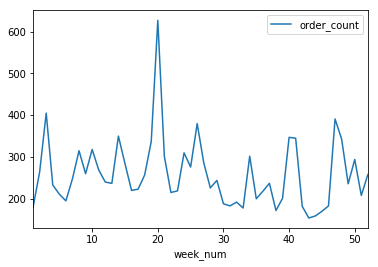

In [357]:
### plot the count of orders per week
df2.plot()
plt.show()

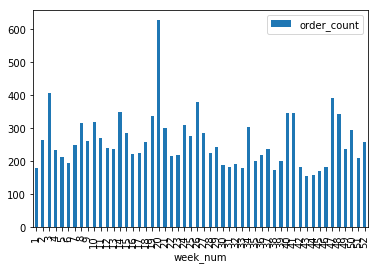

In [358]:
df2.plot(kind = 'bar')
plt.show()

# from figure we can see that order counts are pretty consistent , some spikes here and there like week 20 has 600 order_counts
other obsevation would be after week 29 the oder count are decreased till week 40 and remains same for rst of the year.

# C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?


In [372]:
### mean order value for gender 0 and 1
gender_value = df.groupby('gender').mean()[['dollar_value']]
gender_value


,dollar_value
gender,
0,363.890006
1,350.708361


# I dont think the orer_value is significanlty different 
for gender 0 and 1 as it is almost same with a slight variation in mean value

# D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?


In [373]:
### confusion matrix fro precited gender
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

true = df['gender']
predicted = df['predicted_gender']

gender_confusion_matrix = confusion_matrix(true , predicted)
gender_confusion_matrix



array([[3349, 3410],
       [1463, 5249]])

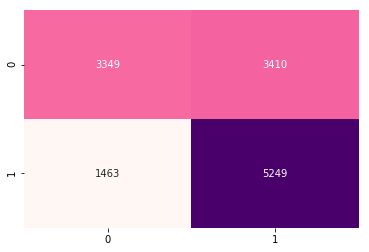

In [374]:
### plot confusion matrix
sns.heatmap(gender_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [375]:
print('Accuracy :', accuracy_score(true , predicted)*100)
print('Claafier Report : \n' ,classification_report(true , predicted) )

Accuracy : 63.825996585257215
Claafier Report : 
               precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

   micro avg       0.64      0.64      0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



# From the confusion matrix we can see that the precitions are not that good as
true postives are less(5249/13471) compared to original gender(true value), with an accuracy of 63.8% and low precision and recall scores which re not good for any classifier



# E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.

My favorite tool is python for data amalysis as i used it most of my class projects and class works , it helped me in
solving many problems especially related to data , as it has handful packages like pandas, numpy , seaborn etc which are really helpful in any data analysis project,
it also has good number of machone learning modules like sklearn which can solve most of the ML problems.
